## Menghubungkan Google Colab ke Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install dan Import Pustaka(library)

In [ ]:
!pip install ultralytics roboflow opencv-python matplotlib roboflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from roboflow import Roboflow
from ultralytics import YOLO

## Mengunduh Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Jg30mLZXEt5tWEETzbxm")
project = rf.workspace("deeplearning-yuw2g").project("yolov8-wvi7o-0cptf")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to yolov8-2 in yolov8::  91%|█████████ | 12460/13724 [00:00<00:00, 16499.31it/s]

Extracting Dataset Version Zip to yolov8-2 in yolov8:: 100%|██████████| 13724/13724 [00:01<00:00, 13583.36it/s]


## Grafik Distribusi Dataset

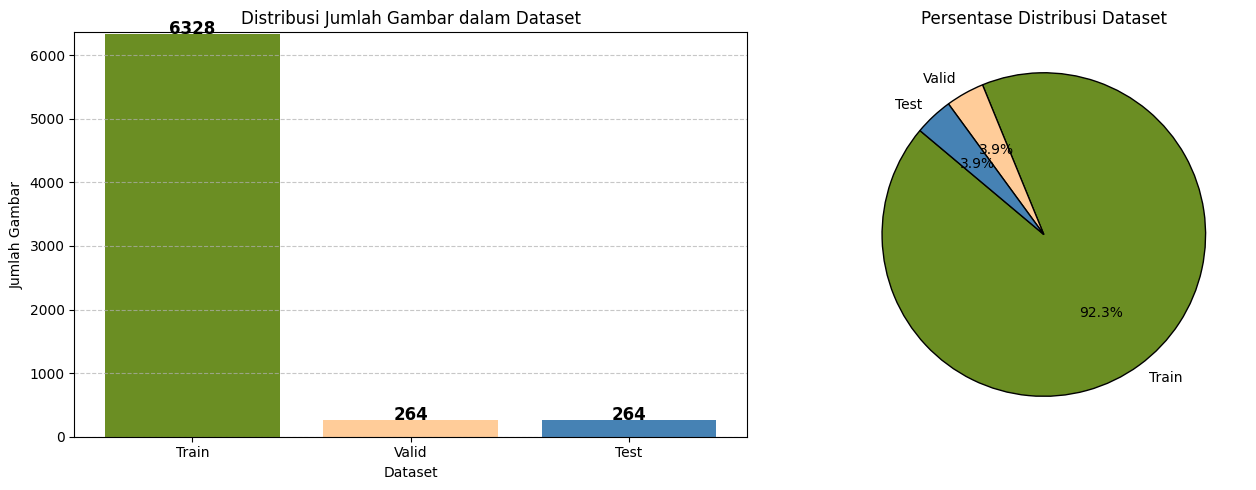

In [ ]:
DATASET_PATH = "/content/drive/MyDrive/Deep Learning/yolov8-2"
TRAIN_DIR = os.path.join(DATASET_PATH, "train/images")
VALID_DIR = os.path.join(DATASET_PATH, "valid/images")
TEST_DIR = os.path.join(DATASET_PATH, "test/images")


def count_files(directory):
    return len(os.listdir(directory)) if os.path.exists(directory) else 0


num_train = count_files(TRAIN_DIR)
num_valid = count_files(VALID_DIR)
num_test = count_files(TEST_DIR)

categories = ["Train", "Valid", "Test"]
counts = [num_train, num_valid, num_test]
colors = ["#6b8e23", "#ffcc99", "#4682b4"]


fig, axes = plt.subplots(1, 2, figsize=(14, 5))


axes[0].bar(categories, counts, color=colors)
axes[0].set_xlabel("Dataset")
axes[0].set_ylabel("Jumlah Gambar")
axes[0].set_title("Distribusi Jumlah Gambar dalam Dataset")
axes[0].set_ylim(0, max(counts) + 30)
axes[0].grid(axis="y", linestyle="--", alpha=0.7)


for i, v in enumerate(counts):
    axes[0].text(i, v + 2, str(v), ha="center", fontsize=12, fontweight="bold")

axes[1].pie(counts, labels=categories, autopct="%1.1f%%", colors=colors, startangle=140, wedgeprops={"edgecolor": "black"})
axes[1].set_title("Persentase Distribusi Dataset")

plt.tight_layout()
plt.show()


## Visualisasi Dataset

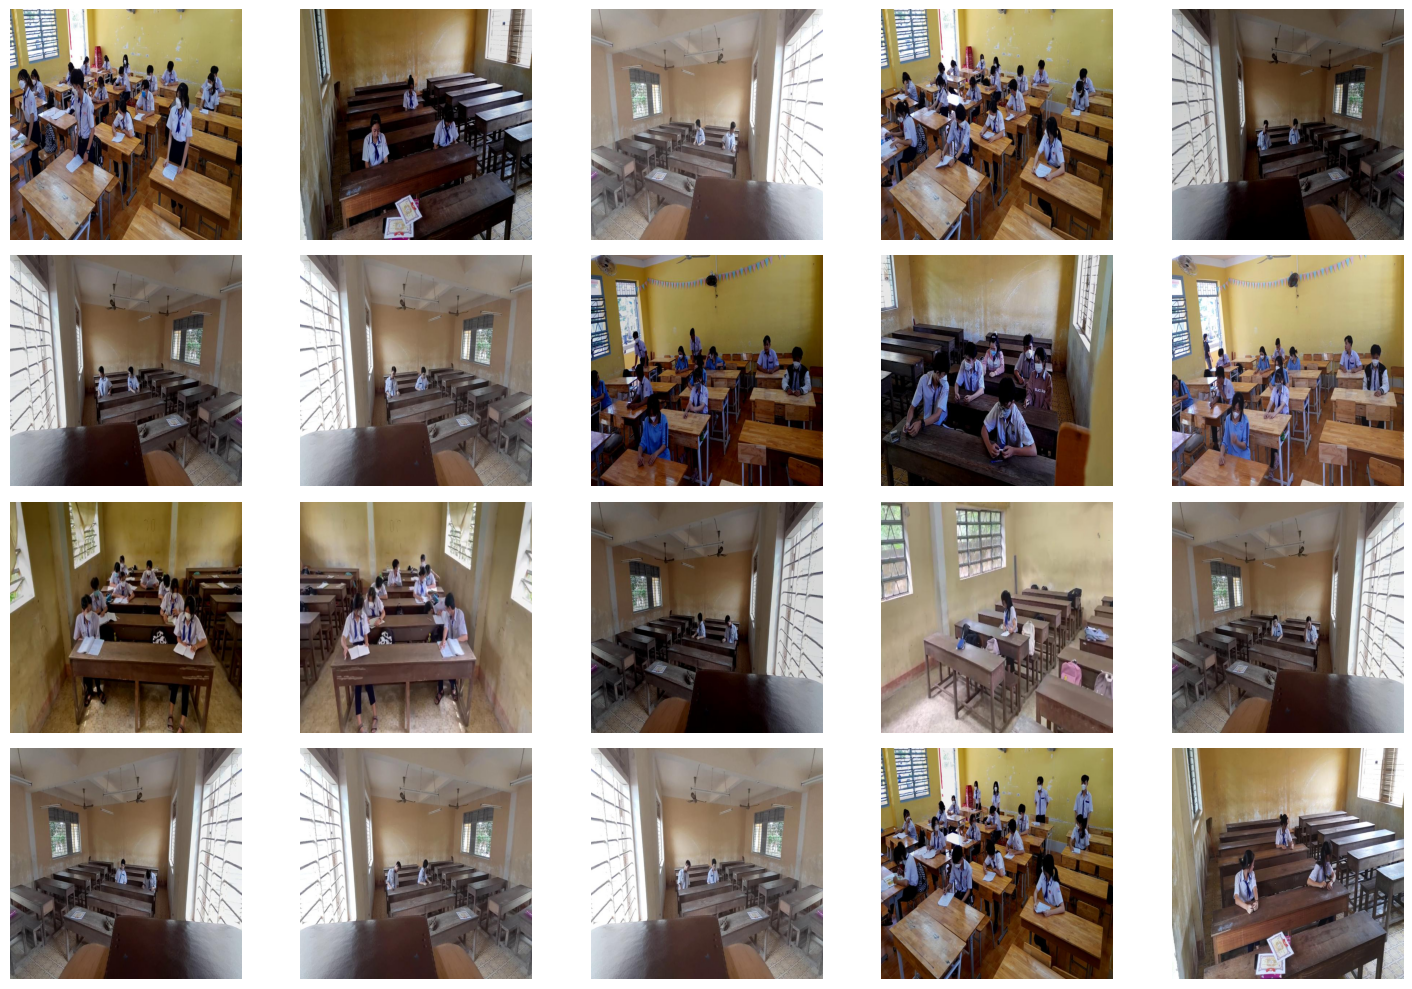

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Ambil gambar dari training set
image_folder = TRAIN_DIR
if os.path.exists(image_folder):
    image_files = os.listdir(image_folder)[:20]  # Ambil 20 gambar pertama

    fig, axes = plt.subplots(4, 5, figsize=(15, 10))  # Layout 4x5
    for i, img_name in enumerate(image_files):
        img_path = os.path.join(image_folder, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Ubah BGR ke RGB

        row, col = divmod(i, 5)
        axes[row, col].imshow(img)
        axes[row, col].axis("off")

    plt.tight_layout()
    plt.show()
else:
    print(f"Folder {image_folder} tidak ditemukan atau kosong.")


## Training

### YOLOv8

In [ ]:
from ultralytics import YOLO

model_YoloV8l= YOLO("yolov8s.pt")

Result_yoloV8l=model_YoloV8l.train(
    data="/content/drive/MyDrive/Deep Learning/yolov8-2/data.yaml",
    epochs=30,
    batch=16,
    lr0=0.001,
    optimizer="AdamW",
)


Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Deep Learning/yolov8-2/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

train: Scanning /content/drive/MyDrive/Deep Learning/yolov8-2/train/labels.cache... 6328 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6328/6328 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Deep Learning/yolov8-2/valid/labels.cache... 264 images, 0 backgrounds, 0 corrupt: 100%|██████████| 264/264 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       6.3G      1.397      1.411      1.207         70        640: 100%|██████████| 396/396 [02:50<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.40it/s]

                   all        264       1524      0.791      0.804       0.87      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      6.34G      1.266     0.9048      1.138         83        640: 100%|██████████| 396/396 [02:45<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.43it/s]


                   all        264       1524      0.856      0.854      0.903      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      6.34G      1.241     0.8348      1.125         99        640: 100%|██████████| 396/396 [02:42<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all        264       1524      0.868      0.886       0.92      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      6.34G      1.208     0.7776      1.116         70        640: 100%|██████████| 396/396 [02:40<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.40it/s]

                   all        264       1524      0.899      0.885      0.933      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      6.37G       1.18     0.7313      1.097         37        640: 100%|██████████| 396/396 [02:42<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]

                   all        264       1524      0.895       0.91      0.942      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      6.37G      1.158     0.7075      1.088         51        640: 100%|██████████| 396/396 [02:39<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.87it/s]

                   all        264       1524      0.899      0.894      0.936      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30       6.7G      1.148     0.6868      1.082         88        640: 100%|██████████| 396/396 [02:38<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]


                   all        264       1524      0.895      0.923      0.935      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30       6.7G      1.133      0.666      1.075         70        640: 100%|██████████| 396/396 [02:39<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        264       1524      0.905      0.921      0.947       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30       6.7G      1.121     0.6497      1.067         40        640: 100%|██████████| 396/396 [02:38<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.01it/s]

                   all        264       1524      0.912      0.912      0.944      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30       6.7G      1.107     0.6319      1.059         68        640: 100%|██████████| 396/396 [02:40<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.66it/s]

                   all        264       1524      0.909      0.927      0.943      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30       6.7G      1.102     0.6206      1.062         74        640: 100%|██████████| 396/396 [02:40<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]

                   all        264       1524      0.928      0.908       0.95      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30       6.7G      1.087     0.6048      1.047         45        640: 100%|██████████| 396/396 [02:38<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all        264       1524      0.925      0.918      0.949       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30       6.7G      1.078     0.5932      1.048         55        640: 100%|██████████| 396/396 [02:39<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        264       1524      0.913      0.935      0.949      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30       6.7G      1.068     0.5849      1.041         52        640: 100%|██████████| 396/396 [02:40<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]

                   all        264       1524      0.925      0.923      0.948      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30       6.7G      1.062     0.5657      1.042         64        640: 100%|██████████| 396/396 [02:38<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.10it/s]

                   all        264       1524      0.909      0.927      0.951      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30       6.7G      1.053     0.5662      1.038         88        640: 100%|██████████| 396/396 [02:39<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all        264       1524      0.928      0.922      0.954      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30       6.7G      1.051      0.561      1.034         51        640: 100%|██████████| 396/396 [02:41<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        264       1524      0.913      0.923      0.955      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30       6.7G       1.04     0.5474      1.033         93        640: 100%|██████████| 396/396 [02:40<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.89it/s]

                   all        264       1524      0.898      0.942      0.955      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30       6.7G      1.024     0.5386      1.025         76        640: 100%|██████████| 396/396 [02:47<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]


                   all        264       1524      0.928       0.92      0.954      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      6.73G      1.034     0.5353      1.028         41        640: 100%|██████████| 396/396 [02:46<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.85it/s]

                   all        264       1524      0.929      0.931      0.956      0.654


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      6.74G      1.012     0.4724      1.061         63        640: 100%|██████████| 396/396 [02:44<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]

                   all        264       1524      0.927      0.937      0.958      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      6.77G      1.004       0.46      1.053         44        640: 100%|██████████| 396/396 [02:33<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.45it/s]

                   all        264       1524      0.931      0.934      0.961      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      6.77G     0.9932     0.4513      1.052         39        640: 100%|██████████| 396/396 [02:33<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.05it/s]

                   all        264       1524      0.933       0.94      0.961      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      6.77G     0.9775     0.4396      1.046         49        640: 100%|██████████| 396/396 [02:30<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.93it/s]

                   all        264       1524      0.935      0.937       0.96      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      6.77G     0.9658     0.4308      1.038         56        640: 100%|██████████| 396/396 [02:31<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]

                   all        264       1524      0.937       0.94      0.958      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      6.77G     0.9579     0.4203      1.031         41        640: 100%|██████████| 396/396 [02:30<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]

                   all        264       1524      0.939      0.938      0.959      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      6.77G     0.9461     0.4111      1.028         48        640: 100%|██████████| 396/396 [02:30<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.44it/s]

                   all        264       1524      0.946      0.929      0.961       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      6.77G     0.9383     0.4064      1.022         41        640: 100%|██████████| 396/396 [02:33<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all        264       1524      0.939       0.94      0.957      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      6.77G     0.9274     0.3977      1.021         45        640: 100%|██████████| 396/396 [02:32<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all        264       1524      0.943       0.94       0.96      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      6.77G     0.9181     0.3912      1.013         38        640: 100%|██████████| 396/396 [02:32<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]


                   all        264       1524      0.944      0.939       0.96      0.682

30 epochs completed in 1.366 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 22.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.08it/s]


                   all        264       1524      0.944      0.939       0.96      0.682
    Bend Over The Desk        137        213      0.937      0.907      0.946      0.647
      Hand Under Table        143        278       0.93      0.957      0.943      0.533
           Look Around        168        311      0.932      0.921      0.962       0.64
                Normal        125        499      0.935      0.948      0.967      0.814
              Stand Up         31         93      0.996          1      0.995      0.866
                  Wave         72        130      0.933        0.9      0.946      0.593
Speed: 0.3ms preprocess, 5.4ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to runs/detect/train2


### YOLOV9


In [ ]:
from ultralytics import YOLO

model_Yolov9s= YOLO("yolov9s.pt")

Result_yoloV9s=model_Yolov9s.train(
    data="/content/drive/MyDrive/Deep Learning/yolov8-2/data.yaml",
    epochs=30,
    batch=16,
    lr0=0.001,
    optimizer="AdamW",
)


100%|██████████| 14.7M/14.7M [00:00<00:00, 120MB/s] 


Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=/content/drive/MyDrive/Deep Learning/yolov8-2/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

100%|██████████| 755k/755k [00:00<00:00, 26.6MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     31104  ultralytics.nn.modules.block.ELAN1           [64, 64, 64, 32]              
  3                  -1  1     73984  ultralytics.nn.modules.block.AConv           [64, 128]                     
  4                  -1  1    258432  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 128, 128, 64, 3]        
  5                  -1  1    221568  ultralytics.nn.modules.block.AConv           [128, 192]                    
  6                  -1  1    579648  ultralytics.nn.modules.block.RepNCSPELAN4    [192, 192, 192, 96, 3]        
  7                  -1  1    442880  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 110MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Deep Learning/yolov8-2/train/labels... 6328 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6328/6328 [02:20<00:00, 44.90it/s] 


train: New cache created: /content/drive/MyDrive/Deep Learning/yolov8-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Deep Learning/yolov8-2/valid/labels... 264 images, 0 backgrounds, 0 corrupt: 100%|██████████| 264/264 [00:03<00:00, 70.07it/s] 


val: New cache created: /content/drive/MyDrive/Deep Learning/yolov8-2/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.85G       1.38      1.304      1.225         70        640: 100%|██████████| 396/396 [03:41<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.64it/s]

                   all        264       1524      0.819       0.82      0.857      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      5.65G      1.278     0.8982      1.161         83        640: 100%|██████████| 396/396 [03:29<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.05it/s]

                   all        264       1524      0.866       0.85      0.907      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      5.69G      1.245     0.8264      1.147         99        640: 100%|██████████| 396/396 [03:16<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.69it/s]


                   all        264       1524      0.878      0.868      0.908      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      5.73G      1.222     0.7685      1.149         70        640: 100%|██████████| 396/396 [03:14<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.64it/s]


                   all        264       1524      0.868      0.913      0.927      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      5.78G       1.19     0.7243      1.127         37        640: 100%|██████████| 396/396 [03:13<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all        264       1524      0.887      0.908      0.935      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      5.82G      1.167     0.6953      1.116         51        640: 100%|██████████| 396/396 [03:13<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.08it/s]

                   all        264       1524       0.89      0.915      0.936      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      5.86G       1.16     0.6759      1.115         88        640: 100%|██████████| 396/396 [03:13<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.06it/s]

                   all        264       1524      0.888      0.916      0.935      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30       5.9G      1.147     0.6624       1.11         70        640: 100%|██████████| 396/396 [03:13<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all        264       1524      0.894      0.928      0.941      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      5.94G      1.137      0.639      1.101         40        640: 100%|██████████| 396/396 [03:15<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]


                   all        264       1524      0.895      0.921      0.933      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.98G      1.118     0.6228      1.091         68        640: 100%|██████████| 396/396 [03:14<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.09it/s]

                   all        264       1524      0.914       0.92      0.937      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      6.03G      1.114     0.6166      1.096         74        640: 100%|██████████| 396/396 [03:11<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.93it/s]

                   all        264       1524      0.894      0.935      0.949      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      6.07G      1.103      0.602      1.079         45        640: 100%|██████████| 396/396 [03:12<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.35it/s]

                   all        264       1524      0.908       0.92      0.946       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      6.11G       1.09     0.5886       1.08         55        640: 100%|██████████| 396/396 [03:13<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]

                   all        264       1524      0.913      0.924      0.951      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      6.15G      1.081     0.5809       1.07         52        640: 100%|██████████| 396/396 [03:11<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all        264       1524      0.922      0.935      0.953      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      6.19G      1.077     0.5627       1.07         64        640: 100%|██████████| 396/396 [03:11<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.68it/s]

                   all        264       1524      0.909      0.941      0.949      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      6.23G      1.064     0.5605      1.067         88        640: 100%|██████████| 396/396 [03:11<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]


                   all        264       1524      0.917       0.93      0.951      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      6.27G      1.066     0.5554      1.066         51        640: 100%|██████████| 396/396 [03:10<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.68it/s]


                   all        264       1524      0.914      0.922      0.951      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      6.32G      1.058      0.547       1.07         93        640: 100%|██████████| 396/396 [03:07<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all        264       1524      0.928      0.924      0.949      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      6.36G      1.039      0.538      1.064         76        640: 100%|██████████| 396/396 [03:09<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]

                   all        264       1524      0.928      0.923      0.951      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30       6.4G      1.049     0.5334      1.067         41        640: 100%|██████████| 396/396 [03:10<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all        264       1524      0.924      0.932      0.953      0.652


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      6.44G      1.032     0.4678        1.1         63        640: 100%|██████████| 396/396 [03:08<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.64it/s]

                   all        264       1524      0.926      0.926      0.953      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      6.48G      1.021     0.4551      1.094         44        640: 100%|██████████| 396/396 [03:02<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.94it/s]

                   all        264       1524      0.923      0.933      0.955      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      6.52G      1.013     0.4482      1.092         39        640: 100%|██████████| 396/396 [03:03<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        264       1524      0.935      0.934      0.959      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      6.56G     0.9996     0.4337      1.086         49        640: 100%|██████████| 396/396 [03:07<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        264       1524      0.923      0.933      0.954      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      6.61G     0.9884     0.4252      1.074         56        640: 100%|██████████| 396/396 [03:03<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all        264       1524      0.927      0.934      0.959      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      6.65G     0.9831     0.4181      1.066         41        640: 100%|██████████| 396/396 [03:04<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.40it/s]

                   all        264       1524       0.91       0.95      0.952      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      6.69G     0.9735     0.4114      1.063         48        640: 100%|██████████| 396/396 [03:03<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.10it/s]

                   all        264       1524      0.938      0.923      0.953       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      6.73G     0.9644     0.4045      1.061         41        640: 100%|██████████| 396/396 [03:04<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]

                   all        264       1524       0.93      0.937      0.955      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      6.77G     0.9537     0.3955      1.059         45        640: 100%|██████████| 396/396 [03:03<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.99it/s]

                   all        264       1524      0.941      0.929      0.953      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      6.81G     0.9483     0.3913      1.051         38        640: 100%|██████████| 396/396 [03:05<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.95it/s]

                   all        264       1524      0.938      0.931      0.956      0.673



30 epochs completed in 1.642 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 15.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 15.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9s summary (fused): 197 layers, 7,169,410 parameters, 0 gradients, 26.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.39it/s]


                   all        264       1524       0.94       0.93      0.956      0.674
    Bend Over The Desk        137        213      0.924      0.862       0.94      0.631
      Hand Under Table        143        278       0.93      0.956      0.938       0.52
           Look Around        168        311      0.936      0.907      0.955      0.622
                Normal        125        499      0.922      0.952      0.965      0.814
              Stand Up         31         93      0.996          1      0.995      0.858
                  Wave         72        130      0.929      0.906      0.943      0.596
Speed: 0.3ms preprocess, 6.5ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/train


### YOLOV10


In [ ]:
from ultralytics import YOLO

model_Yolov10s= YOLO("yolov10s.pt")

Result_yoloV10s=model_Yolov10s.train(
    data="/content/drive/MyDrive/Deep Learning/yolov8-2/data.yaml",
    epochs=30,
    batch=16,
    lr0=0.001,
    optimizer="AdamW",
)


100%|██████████| 15.9M/15.9M [00:00<00:00, 117MB/s] 


Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10s.pt, data=/content/drive/MyDrive/Deep Learning/yolov8-2/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

train: Scanning /content/drive/MyDrive/Deep Learning/yolov8-2/train/labels.cache... 6328 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6328/6328 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Deep Learning/yolov8-2/valid/labels.cache... 264 images, 0 backgrounds, 0 corrupt: 100%|██████████| 264/264 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      9.16G      2.914      3.369      2.427         70        640: 100%|██████████| 396/396 [03:09<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.99it/s]

                   all        264       1524      0.764      0.812       0.84      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      9.16G      2.728       1.98      2.327         83        640: 100%|██████████| 396/396 [03:01<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.64it/s]

                   all        264       1524      0.767      0.797      0.854      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      9.16G      2.681      1.783      2.293         99        640: 100%|██████████| 396/396 [02:59<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]


                   all        264       1524      0.786      0.826      0.885      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      9.16G      2.598      1.638      2.274         70        640: 100%|██████████| 396/396 [02:59<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.72it/s]


                   all        264       1524      0.856      0.888      0.916      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      9.16G      2.535      1.515       2.23         37        640: 100%|██████████| 396/396 [03:00<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all        264       1524      0.853      0.896      0.924      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      9.16G      2.465      1.442      2.209         51        640: 100%|██████████| 396/396 [02:59<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.12it/s]

                   all        264       1524      0.854      0.896      0.923      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      9.16G      2.442      1.396      2.202         88        640: 100%|██████████| 396/396 [02:59<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.13it/s]

                   all        264       1524       0.88       0.91      0.936       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      9.16G      2.405      1.346      2.178         70        640: 100%|██████████| 396/396 [03:01<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all        264       1524      0.901       0.91      0.942      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      9.16G      2.376        1.3      2.164         40        640: 100%|██████████| 396/396 [03:01<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.68it/s]

                   all        264       1524      0.903      0.913      0.938      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      9.16G      2.353      1.257      2.148         68        640: 100%|██████████| 396/396 [02:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.38it/s]


                   all        264       1524      0.889      0.908      0.935      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      9.16G      2.339      1.239       2.15         74        640: 100%|██████████| 396/396 [03:00<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.40it/s]


                   all        264       1524      0.898      0.914      0.943      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      9.16G      2.299      1.203      2.121         45        640: 100%|██████████| 396/396 [03:00<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]


                   all        264       1524      0.888      0.905       0.94      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      9.16G      2.275      1.179      2.118         55        640: 100%|██████████| 396/396 [03:00<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.37it/s]


                   all        264       1524      0.902       0.91       0.94      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      9.16G      2.257       1.16      2.106         52        640: 100%|██████████| 396/396 [02:59<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        264       1524      0.915      0.903      0.939      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      9.16G      2.239      1.115      2.108         64        640: 100%|██████████| 396/396 [02:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.70it/s]

                   all        264       1524      0.921      0.917      0.944      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      9.16G      2.216      1.108      2.099         88        640: 100%|██████████| 396/396 [02:58<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.87it/s]

                   all        264       1524      0.916      0.926      0.946      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      9.16G      2.218      1.099      2.088         51        640: 100%|██████████| 396/396 [02:56<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.46it/s]

                   all        264       1524      0.898      0.923      0.941      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      9.16G      2.193      1.078      2.087         93        640: 100%|██████████| 396/396 [02:57<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

                   all        264       1524      0.922      0.913      0.946       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      9.16G      2.157      1.059      2.067         76        640: 100%|██████████| 396/396 [02:56<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.38it/s]

                   all        264       1524      0.919      0.926      0.952      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      9.16G      2.173      1.046      2.072         41        640: 100%|██████████| 396/396 [02:54<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.10it/s]


                   all        264       1524      0.922      0.933      0.956      0.658
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      9.16G      2.099     0.8746      2.142         63        640: 100%|██████████| 396/396 [02:49<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.73it/s]


                   all        264       1524      0.919      0.925      0.953      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      9.16G      2.076     0.8499      2.126         44        640: 100%|██████████| 396/396 [02:47<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        264       1524      0.909       0.94      0.955       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      9.16G      2.054     0.8326      2.123         39        640: 100%|██████████| 396/396 [02:46<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.15it/s]

                   all        264       1524      0.922      0.933      0.955      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      9.16G      2.026     0.8102      2.112         49        640: 100%|██████████| 396/396 [02:47<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.82it/s]

                   all        264       1524      0.911      0.942      0.948      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      9.16G      2.003     0.7932      2.095         56        640: 100%|██████████| 396/396 [02:47<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.85it/s]

                   all        264       1524      0.932      0.929      0.952       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      9.16G      1.984     0.7745      2.081         41        640: 100%|██████████| 396/396 [02:48<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.14it/s]

                   all        264       1524      0.921       0.93      0.948      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      9.16G      1.957     0.7579      2.074         48        640: 100%|██████████| 396/396 [02:48<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.77it/s]

                   all        264       1524       0.93      0.935      0.952      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      9.16G      1.943     0.7488      2.061         41        640: 100%|██████████| 396/396 [02:49<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.02it/s]

                   all        264       1524      0.939      0.924      0.952      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      9.16G      1.914     0.7249      2.055         45        640: 100%|██████████| 396/396 [02:48<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.64it/s]

                   all        264       1524      0.933      0.934      0.955      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      9.16G      1.898     0.7188      2.041         38        640: 100%|██████████| 396/396 [02:50<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.03it/s]


                   all        264       1524       0.93      0.938       0.95      0.678

30 epochs completed in 1.520 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 16.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 16.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10s summary (fused): 129 layers, 8,039,604 parameters, 0 gradients, 24.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]


                   all        264       1524       0.93      0.935      0.955      0.678
    Bend Over The Desk        137        213      0.895      0.916      0.941      0.642
      Hand Under Table        143        278       0.93      0.952      0.942      0.536
           Look Around        168        311      0.922        0.9      0.954      0.632
                Normal        125        499      0.936      0.944      0.967      0.809
              Stand Up         31         93      0.979      0.992      0.995      0.856
                  Wave         72        130      0.921      0.903      0.929      0.594
Speed: 0.3ms preprocess, 6.7ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train2


### YOLOV11


In [ ]:
from ultralytics import YOLO

model_Yolov11s= YOLO("yolo11s.pt")

Result_yoloV11s=model_Yolov11s.train(
    data="/content/drive/MyDrive/Deep Learning/yolov8-2/data.yaml",
    epochs=30,
    batch=16,
    lr0=0.001,
    optimizer="AdamW",
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 18.4M/18.4M [00:00<00:00, 239MB/s]


Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/drive/MyDrive/Deep Learning/yolov8-2/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

100%|██████████| 755k/755k [00:00<00:00, 25.0MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 88.0MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Deep Learning/yolov8-2/train/labels.cache... 6328 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6328/6328 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Deep Learning/yolov8-2/valid/labels.cache... 264 images, 0 backgrounds, 0 corrupt: 100%|██████████| 264/264 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.13G      1.399       1.33      1.217         70        640: 100%|██████████| 396/396 [25:09<00:00,  3.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        264       1524       0.75      0.779      0.856      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.89G      1.284     0.9314      1.147         83        640: 100%|██████████| 396/396 [02:56<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        264       1524       0.84      0.896      0.901      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.89G       1.26     0.8585      1.135         99        640: 100%|██████████| 396/396 [02:51<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.97it/s]

                   all        264       1524      0.855       0.89      0.915      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.89G      1.218     0.8041      1.124         70        640: 100%|██████████| 396/396 [02:53<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.38it/s]

                   all        264       1524       0.88      0.909       0.93      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.91G      1.193      0.755      1.104         37        640: 100%|██████████| 396/396 [02:49<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.47it/s]

                   all        264       1524      0.876       0.91      0.933      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.92G      1.175     0.7284      1.099         51        640: 100%|██████████| 396/396 [02:50<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.63it/s]

                   all        264       1524      0.887      0.896      0.929      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.92G      1.156     0.7077      1.091         88        640: 100%|██████████| 396/396 [02:50<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.45it/s]

                   all        264       1524       0.89      0.922      0.937      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.95G      1.145     0.6909      1.085         70        640: 100%|██████████| 396/396 [02:52<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.26it/s]

                   all        264       1524      0.907       0.91       0.94       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.96G      1.135     0.6697      1.078         40        640: 100%|██████████| 396/396 [02:50<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.78it/s]

                   all        264       1524      0.899      0.915      0.941      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.96G      1.122     0.6545      1.071         68        640: 100%|██████████| 396/396 [02:51<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.44it/s]

                   all        264       1524      0.914      0.907      0.944      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.96G      1.114     0.6432      1.071         74        640: 100%|██████████| 396/396 [02:50<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.07it/s]

                   all        264       1524        0.9      0.918      0.943      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.96G      1.102     0.6279      1.058         45        640: 100%|██████████| 396/396 [02:49<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.93it/s]

                   all        264       1524      0.907      0.923      0.945       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.96G       1.09     0.6147      1.058         55        640: 100%|██████████| 396/396 [02:52<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]


                   all        264       1524      0.915      0.915      0.947      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.96G      1.086     0.6092      1.053         52        640: 100%|██████████| 396/396 [02:51<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.13it/s]

                   all        264       1524       0.91      0.933      0.951      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.96G      1.078     0.5862      1.054         64        640: 100%|██████████| 396/396 [02:49<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.12it/s]

                   all        264       1524      0.901      0.939      0.951      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.96G      1.065     0.5828      1.047         88        640: 100%|██████████| 396/396 [02:51<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

                   all        264       1524       0.91       0.93      0.948       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.96G      1.064     0.5789      1.043         51        640: 100%|██████████| 396/396 [02:51<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        264       1524      0.917      0.927      0.951      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.96G      1.058     0.5669      1.044         93        640: 100%|██████████| 396/396 [02:52<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.40it/s]

                   all        264       1524      0.918      0.936       0.95      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.96G      1.039     0.5616      1.034         76        640: 100%|██████████| 396/396 [03:03<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.40it/s]


                   all        264       1524      0.922      0.936      0.951      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.96G      1.047     0.5558      1.037         41        640: 100%|██████████| 396/396 [02:49<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        264       1524      0.925      0.934      0.952      0.652


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.96G      1.032     0.4898      1.073         63        640: 100%|██████████| 396/396 [02:35<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        264       1524       0.93      0.933      0.957      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.99G       1.02     0.4793      1.065         44        640: 100%|██████████| 396/396 [02:33<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.68it/s]

                   all        264       1524      0.935      0.932      0.959      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         5G      1.014      0.471      1.064         39        640: 100%|██████████| 396/396 [02:33<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.94it/s]

                   all        264       1524       0.92      0.949      0.959      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         5G     0.9992     0.4596      1.059         49        640: 100%|██████████| 396/396 [02:34<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.38it/s]

                   all        264       1524      0.923      0.945      0.956      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         5G     0.9883      0.449       1.05         56        640: 100%|██████████| 396/396 [02:33<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all        264       1524      0.926      0.945      0.961      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         5G     0.9839     0.4404      1.045         41        640: 100%|██████████| 396/396 [02:33<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all        264       1524      0.935      0.933      0.959      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         5G     0.9706     0.4316      1.041         48        640: 100%|██████████| 396/396 [02:33<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]

                   all        264       1524      0.935      0.948      0.962      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         5G     0.9646     0.4265      1.036         41        640: 100%|██████████| 396/396 [02:40<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.73it/s]

                   all        264       1524      0.931      0.947      0.961      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         5G     0.9538     0.4183      1.034         45        640: 100%|██████████| 396/396 [02:33<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.91it/s]

                   all        264       1524      0.934      0.948       0.96      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      5.03G     0.9458     0.4116      1.027         38        640: 100%|██████████| 396/396 [02:34<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all        264       1524      0.935      0.948      0.958      0.677



30 epochs completed in 1.802 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 19.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.42it/s]


                   all        264       1524      0.934      0.948       0.96      0.677
    Bend Over The Desk        137        213      0.887       0.93      0.951      0.639
      Hand Under Table        143        278      0.934      0.971      0.949      0.535
           Look Around        168        311      0.928      0.923      0.958       0.63
                Normal        125        499      0.932      0.944      0.963      0.807
              Stand Up         31         93      0.995          1      0.995      0.858
                  Wave         72        130       0.93      0.918      0.943      0.596
Speed: 0.3ms preprocess, 5.1ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/train


## Membandingkan Metrik Evaluasi

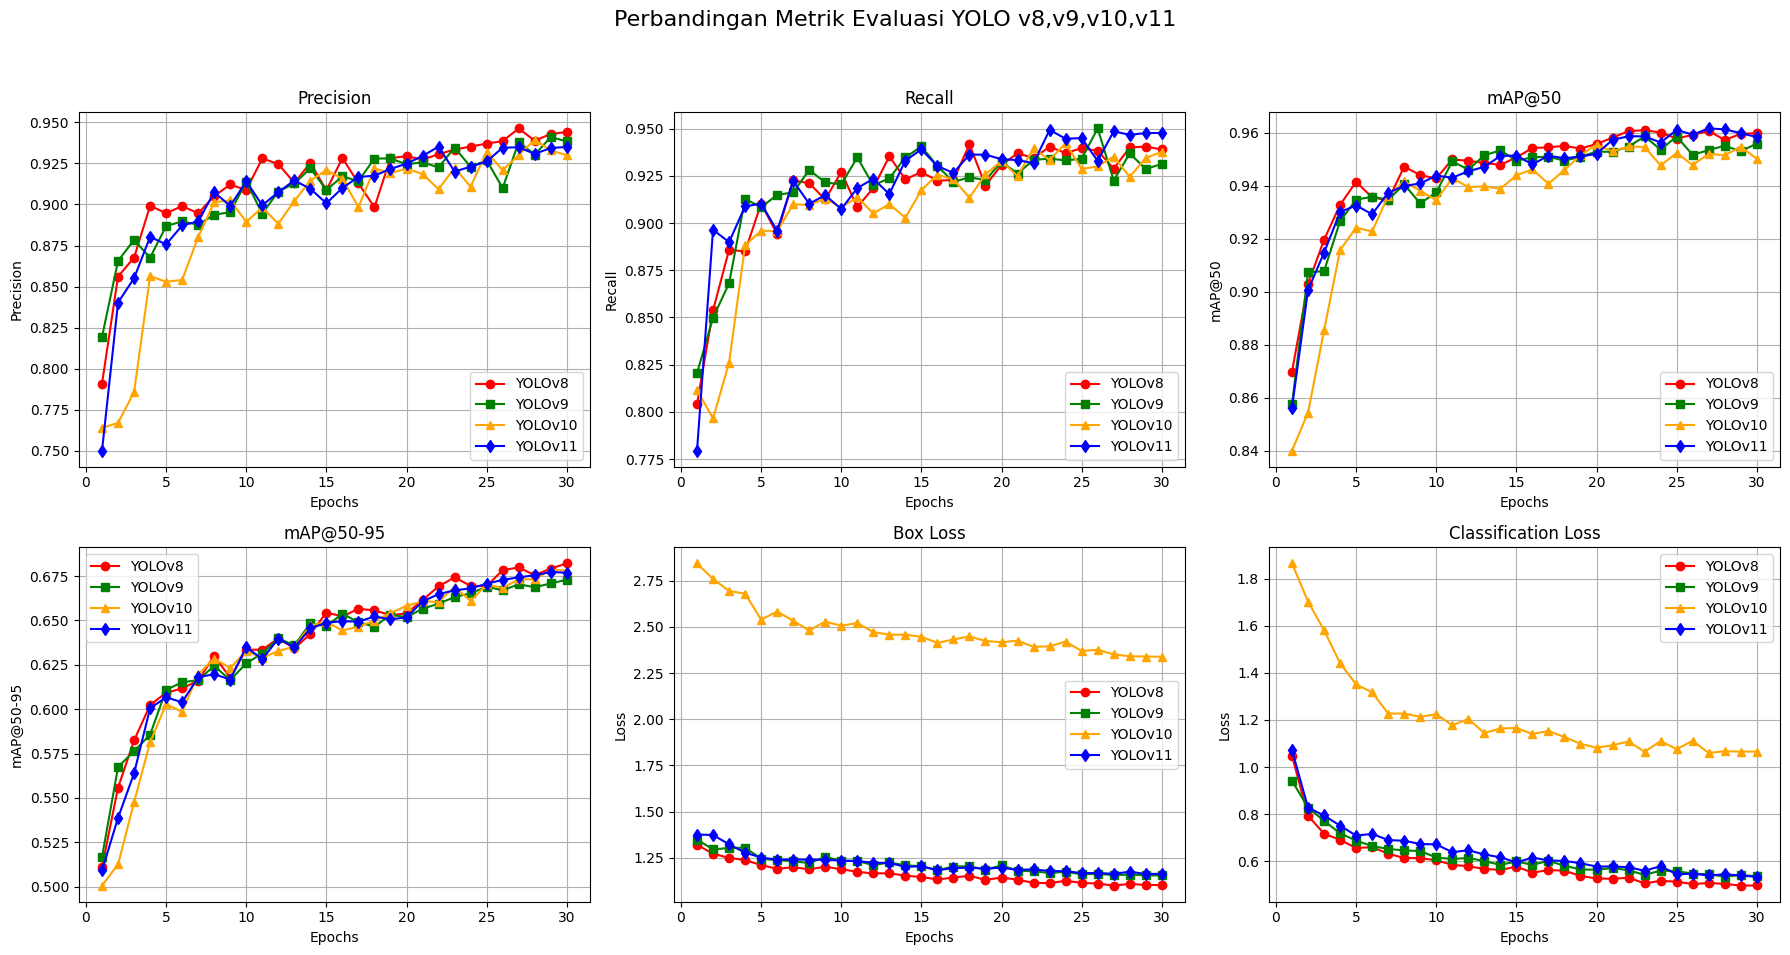

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df_yolov8 = pd.read_csv('/content/drive/MyDrive/Deep Learning/runsyolov8/detect/train2/results.csv')
df_yolov9 = pd.read_csv('/content/drive/MyDrive/Deep Learning/runsyolov9/detect/train/results.csv')
df_yolov10 = pd.read_csv('/content/drive/MyDrive/Deep Learning/runsyolov10/detect/train2/results.csv')
df_yolov11 = pd.read_csv('/content/drive/MyDrive/Deep Learning/runsyolov11/detect/train/results.csv')


fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Perbandingan Metrik Evaluasi YOLO v8,v9,v10,v11", fontsize=16)


axes[0, 0].plot(df_yolov8['epoch'], df_yolov8['metrics/precision(B)'], marker='o', label="YOLOv8", color='red')
axes[0, 0].plot(df_yolov9['epoch'], df_yolov9['metrics/precision(B)'], marker='s', label="YOLOv9", color='green')
axes[0, 0].plot(df_yolov10['epoch'], df_yolov10['metrics/precision(B)'], marker='^', label="YOLOv10", color='orange')
axes[0, 0].plot(df_yolov11['epoch'], df_yolov11['metrics/precision(B)'], marker='d', label="YOLOv11", color='blue')
axes[0, 0].set_title("Precision")
axes[0, 0].set_xlabel("Epochs")
axes[0, 0].set_ylabel("Precision")
axes[0, 0].legend()
axes[0, 0].grid(True)


axes[0, 1].plot(df_yolov8['epoch'], df_yolov8['metrics/recall(B)'], marker='o', label="YOLOv8", color='red')
axes[0, 1].plot(df_yolov9['epoch'], df_yolov9['metrics/recall(B)'], marker='s', label="YOLOv9", color='green')
axes[0, 1].plot(df_yolov10['epoch'], df_yolov10['metrics/recall(B)'], marker='^', label="YOLOv10", color='orange')
axes[0, 1].plot(df_yolov11['epoch'], df_yolov11['metrics/recall(B)'], marker='d', label="YOLOv11", color='blue')
axes[0, 1].set_title("Recall")
axes[0, 1].set_xlabel("Epochs")
axes[0, 1].set_ylabel("Recall")
axes[0, 1].legend()
axes[0, 1].grid(True)


axes[0, 2].plot(df_yolov8['epoch'], df_yolov8['metrics/mAP50(B)'], marker='o', label="YOLOv8", color='red')
axes[0, 2].plot(df_yolov9['epoch'], df_yolov9['metrics/mAP50(B)'], marker='s', label="YOLOv9", color='green')
axes[0, 2].plot(df_yolov10['epoch'], df_yolov10['metrics/mAP50(B)'], marker='^', label="YOLOv10", color='orange')
axes[0, 2].plot(df_yolov11['epoch'], df_yolov11['metrics/mAP50(B)'], marker='d', label="YOLOv11", color='blue')
axes[0, 2].set_title("mAP@50")
axes[0, 2].set_xlabel("Epochs")
axes[0, 2].set_ylabel("mAP@50")
axes[0, 2].legend()
axes[0, 2].grid(True)

axes[1, 0].plot(df_yolov8['epoch'], df_yolov8['metrics/mAP50-95(B)'], marker='o', label="YOLOv8", color='red')
axes[1, 0].plot(df_yolov9['epoch'], df_yolov9['metrics/mAP50-95(B)'], marker='s', label="YOLOv9", color='green')
axes[1, 0].plot(df_yolov10['epoch'], df_yolov10['metrics/mAP50-95(B)'], marker='^', label="YOLOv10", color='orange')
axes[1, 0].plot(df_yolov11['epoch'], df_yolov11['metrics/mAP50-95(B)'], marker='d', label="YOLOv11", color='blue')
axes[1, 0].set_title("mAP@50-95")
axes[1, 0].set_xlabel("Epochs")
axes[1, 0].set_ylabel("mAP@50-95")
axes[1, 0].legend()
axes[1, 0].grid(True)


axes[1, 1].plot(df_yolov8['epoch'], df_yolov8['val/box_loss'], marker='o', label="YOLOv8", color='red')
axes[1, 1].plot(df_yolov9['epoch'], df_yolov9['val/box_loss'], marker='s', label="YOLOv9", color='green')
axes[1, 1].plot(df_yolov10['epoch'], df_yolov10['val/box_loss'], marker='^', label="YOLOv10", color='orange')
axes[1, 1].plot(df_yolov11['epoch'], df_yolov11['val/box_loss'], marker='d', label="YOLOv11", color='blue')
axes[1, 1].set_title("Box Loss")
axes[1, 1].set_xlabel("Epochs")
axes[1, 1].set_ylabel("Loss")
axes[1, 1].legend()
axes[1, 1].grid(True)

axes[1, 2].plot(df_yolov8['epoch'], df_yolov8['val/cls_loss'], marker='o', label="YOLOv8", color='red')
axes[1, 2].plot(df_yolov9['epoch'], df_yolov9['val/cls_loss'], marker='s', label="YOLOv9", color='green')
axes[1, 2].plot(df_yolov10['epoch'], df_yolov10['val/cls_loss'], marker='^', label="YOLOv10", color='orange')
axes[1, 2].plot(df_yolov11['epoch'], df_yolov11['val/cls_loss'], marker='d', label="YOLOv11", color='blue')
axes[1, 2].set_title("Classification Loss")
axes[1, 2].set_xlabel("Epochs")
axes[1, 2].set_ylabel("Loss")
axes[1, 2].legend()
axes[1, 2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Testing


image 1/1 /content/drive/MyDrive/Deep Learning/yolov8-2/test/images/10842_png.rf.aa707cc4ae072c6725adb9995ba36e1c.jpg: 640x640 5 Hand Under Tables, 7 Normals, 16.5ms
Speed: 3.2ms preprocess, 16.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


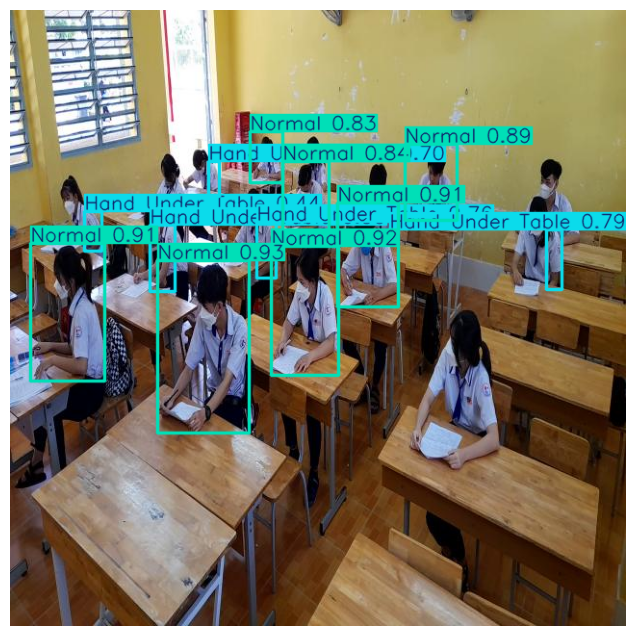

In [ ]:
image_path = "/content/drive/MyDrive/Deep Learning/yolov8-2/test/images/10842_png.rf.aa707cc4ae072c6725adb9995ba36e1c.jpg"

results = model(image_path)

for r in results:
    annotated_img = r.plot()
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(annotated_img)
    plt.axis("off")
    plt.show()


## Evaluation

In [ ]:
from ultralytics import YOLO

model = YOLO("/content/runs/detect/train2/weights/best.pt")
metrics = model.val()

Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/Deep Learning/yolov8-2/valid/labels.cache... 264 images, 0 backgrounds, 0 corrupt: 100%|██████████| 264/264 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:09<00:00,  1.85it/s]


                   all        264       1524      0.944      0.938       0.96      0.682
    Bend Over The Desk        137        213      0.937      0.906      0.946      0.648
      Hand Under Table        143        278       0.93      0.956      0.943      0.534
           Look Around        168        311      0.932       0.92      0.962       0.64
                Normal        125        499      0.937      0.949      0.967      0.813
              Stand Up         31         93      0.996          1      0.995      0.865
                  Wave         72        130      0.934        0.9      0.946      0.595
Speed: 3.7ms preprocess, 9.7ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/val


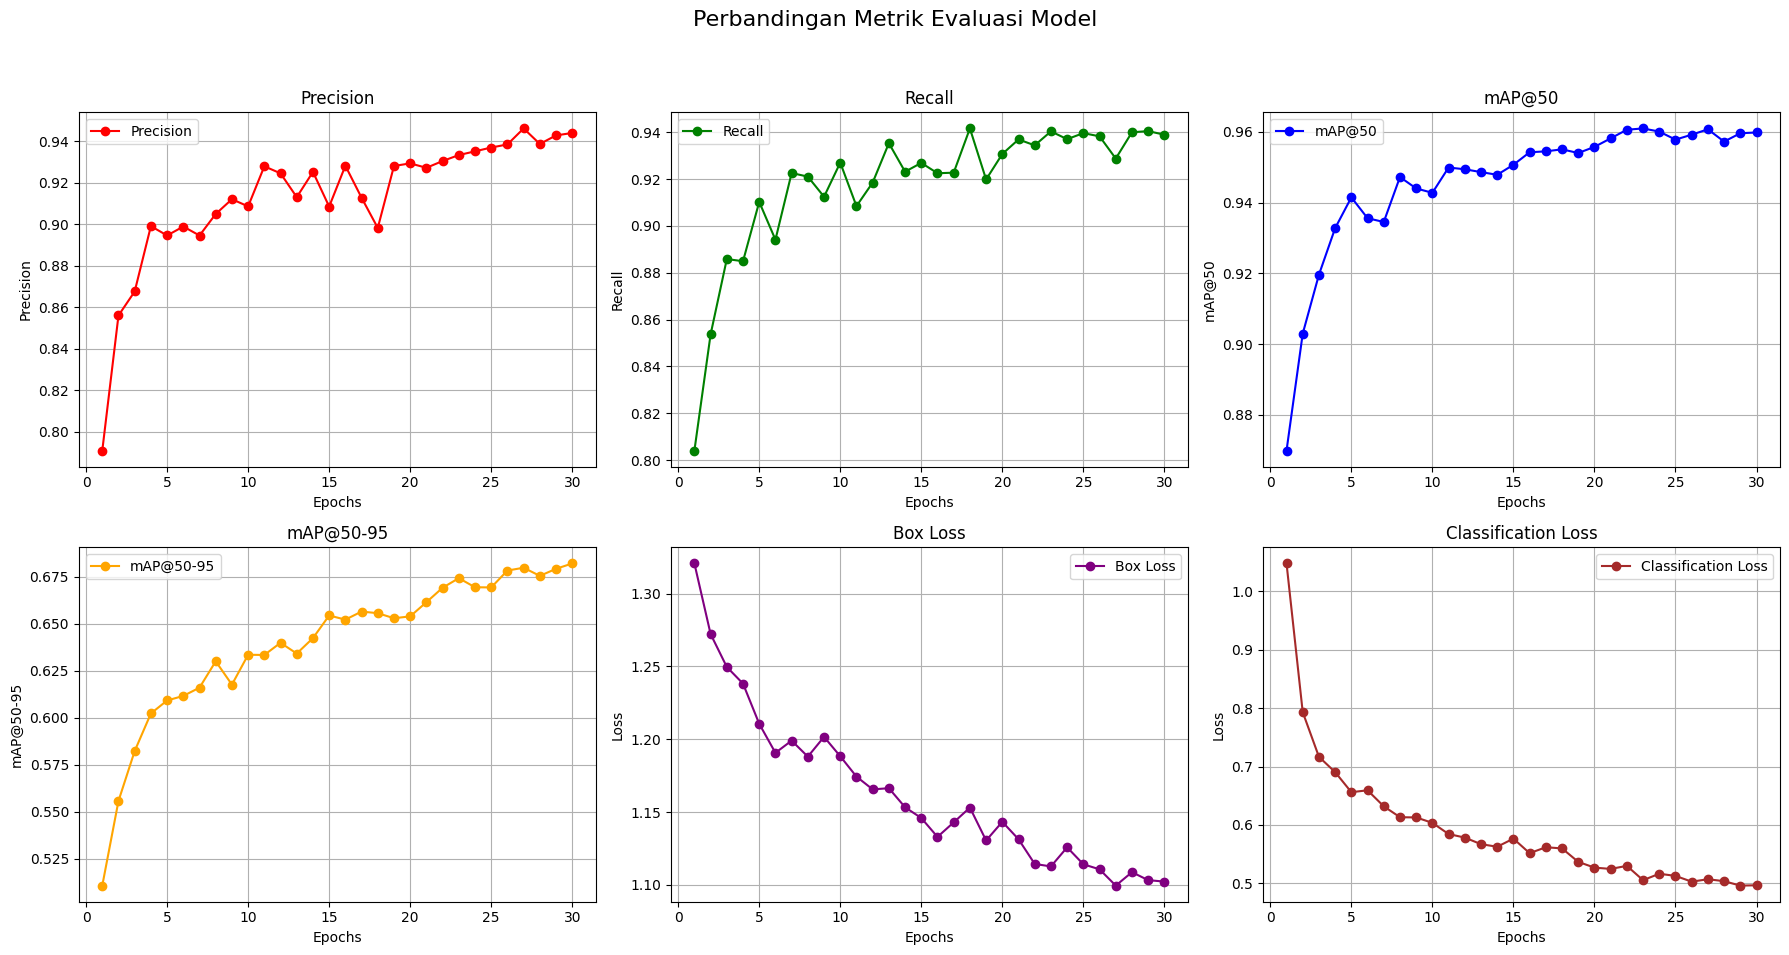

In [10]:
df = pd.read_csv('/content/drive/MyDrive/Deep Learning/runsyolov8/detect/train2/results.csv')


fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Perbandingan Metrik Evaluasi Model", fontsize=16)

axes[0, 0].plot(df['epoch'], df['metrics/precision(B)'], marker='o', label="Precision", color='red')
axes[0, 0].set_title("Precision")
axes[0, 0].set_xlabel("Epochs")
axes[0, 0].set_ylabel("Precision")
axes[0, 0].legend()
axes[0, 0].grid(True)

axes[0, 1].plot(df['epoch'], df['metrics/recall(B)'], marker='o', label="Recall", color='green')
axes[0, 1].set_title("Recall")
axes[0, 1].set_xlabel("Epochs")
axes[0, 1].set_ylabel("Recall")
axes[0, 1].legend()
axes[0, 1].grid(True)

axes[0, 2].plot(df['epoch'], df['metrics/mAP50(B)'], marker='o', label="mAP@50", color='blue')
axes[0, 2].set_title("mAP@50")
axes[0, 2].set_xlabel("Epochs")
axes[0, 2].set_ylabel("mAP@50")
axes[0, 2].legend()
axes[0, 2].grid(True)

axes[1, 0].plot(df['epoch'], df['metrics/mAP50-95(B)'], marker='o', label="mAP@50-95", color='orange')
axes[1, 0].set_title("mAP@50-95")
axes[1, 0].set_xlabel("Epochs")
axes[1, 0].set_ylabel("mAP@50-95")
axes[1, 0].legend()
axes[1, 0].grid(True)

axes[1, 1].plot(df['epoch'], df['val/box_loss'], marker='o', label="Box Loss", color='purple')
axes[1, 1].set_title("Box Loss")
axes[1, 1].set_xlabel("Epochs")
axes[1, 1].set_ylabel("Loss")
axes[1, 1].legend()
axes[1, 1].grid(True)

axes[1, 2].plot(df['epoch'], df['val/cls_loss'], marker='o', label="Classification Loss", color='brown')
axes[1, 2].set_title("Classification Loss")
axes[1, 2].set_xlabel("Epochs")
axes[1, 2].set_ylabel("Loss")
axes[1, 2].legend()
axes[1, 2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
